
# Project: Investigation of Movie Trends
Richard
## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, I will be analyzing a database of various movie titles, from 1960 to 2020, to explore patterns within the data. This data is from The Movie Database (TMDb). 

### Questions:
1. How has the popularity of certain genres changed over the years?
2. What properties are associated with high revenue movies? 

In [1]:
#Import packages used
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

<a id='wrangling'></a>
## Data Wrangling
Database: 'movie.csv'

### General Properties
The Movies Database includes columns for data such as id, popularity, budget, revenue, movie title, cast, director, genre, etc.

In [2]:
#load data to see structure of rows and columns
movies = pd.read_csv('movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


In [3]:
#checking for null values and incorect data types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
#summary of the data
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
#checking for duplicates
sum(movies.duplicated())  

1

In [6]:
#checking for revenue/ budget with 0 as the value
movies.query('revenue == 0 | budget ==0').head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
30,280996,tt3168230,3.927333,0,29355203,Mr. Holmes,Ian McKellen|Milo Parker|Laura Linney|Hattie M...,http://www.mrholmesfilm.com/,Bill Condon,The man behind the myth,...,"The story is set in 1947, following a long-ret...",103,Mystery|Drama,BBC Films|See-Saw Films|FilmNation Entertainme...,6/19/2015,425,6.4,2015,0.00,2.700677e+07
36,339527,tt1291570,3.358321,0,22354572,Solace,Abbie Cornish|Jeffrey Dean Morgan|Colin Farrel...,NaN,Afonso Poyart,"A serial killer who can see your future, a psy...",...,"A psychic doctor, John Clancy, works with an F...",101,Crime|Drama|Mystery,Eden Rock Media|FilmNation Entertainment|Flynn...,9/3/2015,474,6.2,2015,0.00,2.056620e+07
48,265208,tt2231253,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,NaN,Simon West,Never bet against a man with a killer hand.,...,When a Las Vegas bodyguard with lethal skills ...,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,1/14/2015,481,5.3,2015,27599987.86,0.000000e+00
67,334074,tt3247714,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,http://survivormovie.com/,James McTeigue,His Next Target is Now Hunting Him,...,A Foreign Service Officer in London tries to p...,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,5/21/2015,280,5.4,2015,18399991.90,0.000000e+00
72,284289,tt2911668,2.272044,0,45895,Beyond the Reach,Michael Douglas|Jeremy Irvine|Hanna Mangan Law...,NaN,Jean-Baptiste LÃ©onetti,NaN,...,A high-rolling corporate shark and his impover...,95,Thriller,Furthur Films,4/17/2015,81,5.5,2015,0.00,4.222338e+04


In [7]:
movies.shape

(10866, 21)

At first glance, I notice that there are missing values, values incorrectly labled as 0, duplicate rows and some datatypes that are incorrect.
### Data Cleaning 



In [8]:
#Dropped data that were incomplete/ irrelevant to analysis. 
movies = movies.drop(['imdb_id','cast','homepage','tagline','keywords','overview','production_companies', 'director', 'release_date'], axis = 1)

In [9]:
#Changed data types to correct ones
movies['release_year'] = movies['release_year'].astype(int)

In [10]:
#Replaced all rows where revenue/ budet was 0 with the average values and dropped null values
movies['budget']=movies['budget'].replace(0,movies['budget'].mean())
movies['revenue']=movies['revenue'].replace(0,movies['revenue'].mean())
movies['budget_adj']=movies['budget_adj'].replace(0,movies['budget_adj'].mean())
movies['revenue_adj']=movies['revenue_adj'].replace(0,movies['revenue_adj'].mean())
movies.dropna(inplace = True)

For columns with missing/ incorrect values for numerical columns I tried to preserve the rows since I could take the average of the data I had to fill those values. However, for text columns with missing data I decided to drop the rows because I could not fill the values. 

In [11]:
# Removed all duplicate rows
movies.drop_duplicates(inplace = True)

In [12]:
#Create a new column 'decades' to better sort data.
decades = [1960,1970,1980,1990,2000,2010]
decade_edges = [1959,1969,1979,1989,1999,2009,2019]
movies['decades'] = pd.cut(movies['release_year'],decade_edges, labels = decades)

I created a column 'decades' to be able to more easily agregate the data in future analysis.

In [13]:
#check the table to see if it looks like how I want it. 
movies.head()

,id,popularity,budget,revenue,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,decades
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09,2010
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08,2010
2,262500,13.112507,110000000.0,2.952382e+08,Insurgent,119,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08,2010
3,140607,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09,2010
4,168259,9.335014,190000000.0,1.506249e+09,Furious 7,137,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09,2010


In [14]:
#check if there are no null values
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   id              10842 non-null  int64   
 1   popularity      10842 non-null  float64 
 2   budget          10842 non-null  float64 
 3   revenue         10842 non-null  float64 
 4   original_title  10842 non-null  object  
 5   runtime         10842 non-null  int64   
 6   genres          10842 non-null  object  
 7   vote_count      10842 non-null  int64   
 8   vote_average    10842 non-null  float64 
 9   release_year    10842 non-null  int32   
 10  budget_adj      10842 non-null  float64 
 11  revenue_adj     10842 non-null  float64 
 12  decades         10842 non-null  category
dtypes: category(1), float64(6), int32(1), int64(3), object(2)
memory usage: 1.0+ MB


<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: How has the popularity of horror, comedy and action movies changed over the years?

In [15]:
# created subsets for the three genres I will be studying 
movies_horror = movies[movies['genres'].str.contains('Horror')]
movies_comedy = movies[movies['genres'].str.contains('Comedy')]
movies_action = movies[movies['genres'].str.contains('Action')]

In [16]:
# list for average popularity of horror films
horror_mean_pop = []
for decade in decades:
    mean_pop = movies_horror[movies_horror['decades']== decade].popularity.mean()
    horror_mean_pop.append(mean_pop)
    

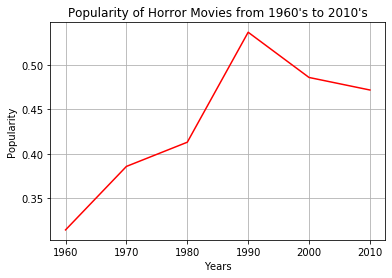

In [17]:
# Used decades and horror_mean_pop lists that I created earlier as x and y axis
plt.plot(decades, horror_mean_pop, color = 'r')
plt.title("Popularity of Horror Movies from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Popularity')
plt.grid(True);

You can see that the overall popularity of horror movies was going up from 1960's to 1990's. However the popularity of horror films has been declining since. 


In [18]:
# list of number of horror movies
horror_movies_count = []
for decade in decades:
    movies_count = movies_horror[movies_horror['decades']== decade].id.count()
    horror_movies_count.append(movies_count) 

Text(0, 0.5, 'Number of Movies')

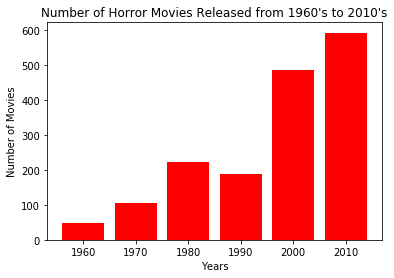

In [19]:
# Creating bar graph of number of horror movies per decade
locations = [1,2,3,4,5,6]
plt.bar(locations, horror_movies_count, tick_label = decades, color = 'r')
plt.title("Number of Horror Movies Released from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Number of Movies')

The number of horror films being produced per decade has steadily increased over time. It is interesting to see that after the 1990's (the peak of popularity for horror films) the amount of horror films being produced dramatically increased, however the popularity declined. 

In [20]:
#List for average popularity of comedy films
comedy_mean_pop = []
for decade in decades:
    mean_pop = movies_comedy[movies_comedy['decades'] == decade].popularity.mean()
    comedy_mean_pop.append(mean_pop)

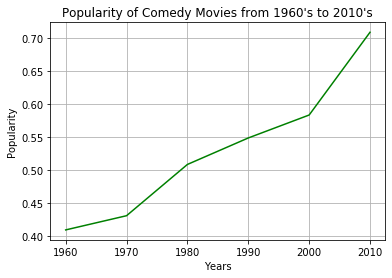

In [21]:
plt.plot(decades, comedy_mean_pop, color= 'g')
plt.title("Popularity of Comedy Movies from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Popularity')
plt.grid(True);

The popularity of comedy films has steadily increased over time. 

In [22]:
#amount of comedy movies produced
comedy_movies_count = []
for decade in decades:
    movies_count = movies_comedy[movies_comedy['decades']== decade].id.count()
    comedy_movies_count.append(movies_count) 

Text(0, 0.5, 'Number of Movies')

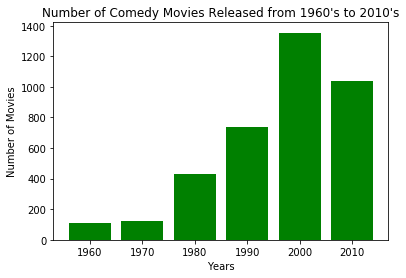

In [23]:
plt.bar(locations, comedy_movies_count, tick_label = decades, color = 'g')
plt.title("Number of Comedy Movies Released from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Number of Movies')

The amount of comedy films being produced every decade has increased over time. There was a small decline of production in 2010's but the popularity of these films still went up. 


In [24]:
#popularity of action movies over time
action_mean_pop = []
for decade in decades:
    mean_pop = movies_action[movies_action['decades'] == decade].popularity.mean()
    action_mean_pop.append(mean_pop)

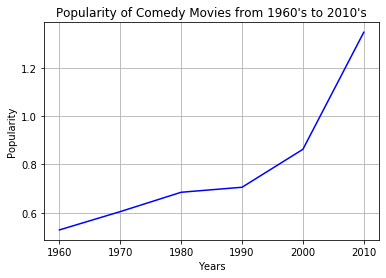

In [25]:
plt.plot(decades, action_mean_pop, color = 'b')
plt.title("Popularity of Comedy Movies from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Popularity')
plt.grid(True);

Action movies were gaining popularity from the 1960's to 2000's, but in the last decade they have grown much faster and are even more popular. 

In [26]:
#amount of action movies made
action_movies_count = []
for decade in decades:
    movies_count = movies_action[movies_action['decades']== decade].id.count()
    action_movies_count.append(movies_count) 

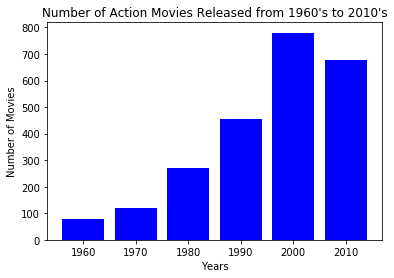

In [27]:
plt.bar(locations, action_movies_count, tick_label = decades, color = 'b')
plt.title("Number of Action Movies Released from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Number of Movies');

The number of action films produced per decade has also increased over time. Similar to comedy films, despite the decline in production for 2010's action films increased in popularity for that decade.

In [28]:
# popularity of movies in general
movie_pop= []
for decade in decades:
    mean_pop = movies[movies['decades'] == decade].popularity.mean()
    movie_pop.append(mean_pop)

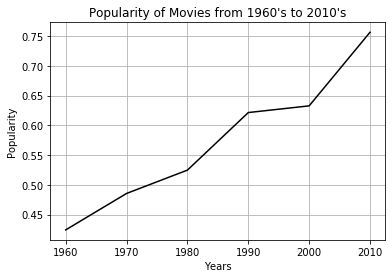

In [29]:
plt.plot(decades, movie_pop, color = 'black')
plt.title("Popularity of Movies from 1960's to 2010's")
plt.xlabel('Years')
plt.ylabel('Popularity')
plt.grid(True);

I decided to look at the popularity of all movie genres from 1960's and 2010's to compare results. As you can see, movies have been gaining popularity since the 1960's. Since movies in general are more and more popular it makes sense that the popularity of horror, comedy and action films all also follow a general uptrend. 

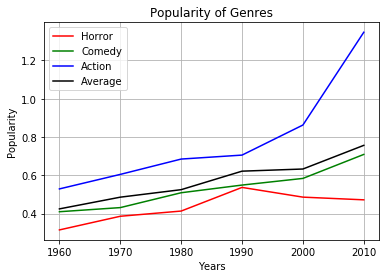

In [30]:
plt.plot(decades, horror_mean_pop, color = 'r', label = 'Horror')
plt.plot(decades, comedy_mean_pop, color= 'g', label = 'Comedy')
plt.plot(decades, action_mean_pop, color = 'b', label = 'Action')
plt.plot(decades, movie_pop, color = 'black', label = 'Average')
plt.title('Popularity of Genres')
plt.ylabel('Popularity')
plt.xlabel('Years')
plt.grid(True)
plt.legend();

You can see in this combined chart that the popularity of horror films are below average, the popularity of comedy films are about average and the popularity of action films are above average

### Research Question 2: What properties are associated with movies that have higher revenues?

In [31]:
#Seperated database into low revenue and high revenue movies
mean_rev = movies.revenue_adj.mean()
high_revenue = movies.query('revenue_adj >= {}'.format(mean_rev))
low_revenue = movies.query('revenue_adj < {}'.format(mean_rev))

In [32]:
high_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,1758.000000,1758.000000,1.758000e+03,1.758000e+03,1758.000000,1758.000000,1758.000000,1758.000000,1.758000e+03,1.758000e+03
mean,31333.559727,1.750859,5.695232e+07,2.124704e+08,114.461320,912.467577,6.361092,1999.311718,6.705867e+07,2.748136e+08
std,58699.865522,1.920188,5.125948e+07,2.190186e+08,25.382637,1140.221513,0.725179,12.517834,5.180110e+07,2.610254e+08
min,11.000000,0.017498,1.130000e+02,1.140353e+07,44.000000,10.000000,3.400000,1960.000000,2.248029e+02,7.998173e+07
25%,1921.750000,0.780952,1.800000e+07,9.008415e+07,99.000000,211.000000,5.900000,1992.000000,2.709848e+07,1.165857e+08
50%,9692.000000,1.241308,4.000000e+07,1.406194e+08,111.000000,500.500000,6.400000,2002.000000,5.280050e+07,1.825027e+08
75%,22952.750000,2.061210,8.000000e+07,2.483180e+08,126.000000,1126.000000,6.900000,2009.000000,9.287401e+07,3.277022e+08
max,417859.000000,32.985763,3.800000e+08,2.781506e+09,705.000000,9767.000000,8.300000,2015.000000,3.683713e+08,2.827124e+09


In [33]:
low_revenue.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9084.000000,9084.000000,9.084000e+03,9.084000e+03,9084.000000,9084.000000,9084.000000,9084.000000,9.084000e+03,9.084000e+03
mean,72554.542712,0.433923,1.560512e+07,3.278923e+07,99.753633,83.391237,5.899163,2001.702444,1.897567e+07,4.214316e+07
std,95687.137092,0.448929,1.236698e+07,1.508017e+07,31.767875,182.434913,0.951547,12.834693,1.480225e+07,1.860803e+07
min,5.000000,0.000065,1.000000e+00,2.000000e+00,0.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,11943.750000,0.184325,1.462570e+07,2.877128e+07,90.000000,15.000000,5.300000,1995.000000,1.755104e+07,3.822091e+07
50%,24758.500000,0.323751,1.462570e+07,3.982332e+07,97.000000,28.000000,6.000000,2006.000000,1.755104e+07,5.136436e+07
75%,84343.500000,0.538413,1.462570e+07,3.982332e+07,108.000000,74.000000,6.600000,2012.000000,1.755104e+07,5.136436e+07
max,414419.000000,11.422751,4.250000e+08,8.616565e+07,900.000000,5754.000000,9.200000,2015.000000,4.250000e+08,7.979920e+07


Summary statistics for low and high revenue subsets. From looking at these descriptions you can clearly see there are significant differences in popularity and budget.

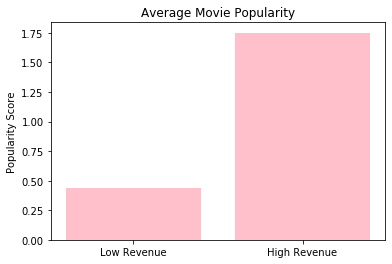

In [34]:
#Comparing popularity of low revenue and popularity of high revenue movies
location = [1,2]
labels = ['Low Revenue', 'High Revenue']
popularity = [low_revenue.popularity.mean(), high_revenue.popularity.mean()]
plt.bar(location, popularity, tick_label = labels, color = 'pink')
plt.title('Average Movie Popularity')
plt.ylabel('Popularity Score');


On average movies with higher revenues are far more popular than movies with lower revenues.  

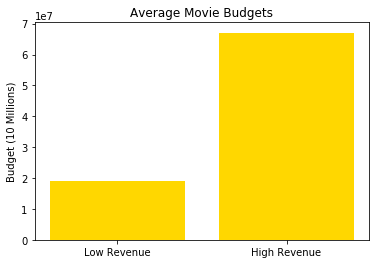

In [35]:
#Comparing budget of low revenue and budget of high revenue movies
location = [1,2]
labels = ['Low Revenue', 'High Revenue']
budget = [low_revenue.budget_adj.mean(), high_revenue.budget_adj.mean()]
plt.bar(location, budget, tick_label = labels, color = 'gold')
plt.title('Average Movie Budgets')
plt.ylabel('Budget (10 Millions)');

Movies with higher revenues also have a higher cost (budget).

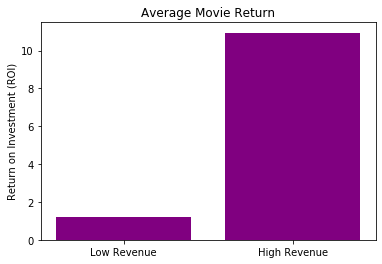

In [36]:
#Comparing return of low revenue and high revenue movies
roi_low = (low_revenue.revenue_adj.mean()-low_revenue.budget_adj.mean())/(low_revenue.budget_adj.mean())
roi_high = (high_revenue.revenue_adj.mean()-high_revenue.budget_adj.mean())/(low_revenue.budget_adj.mean())
roi = [roi_low, roi_high]
plt.bar(location, roi, tick_label= labels, color = 'purple')
plt.title('Average Movie Return')
plt.ylabel('Return on Investment (ROI)');

Although high revenue movies have a higher cost, their return on investment (ROI) is substantially greater than the ROI for low revenue movies that cost less to make. 

<a id='conclusions'></a>
## Conclusions

> 1. The popularity of movies has gone up consistently over time.
> 2. The popularity of horror films are below average and has been decreasing for the past 20 years.
> 3. The popularity of comedy films are average and increasing over time
> 4. The popularity of action movies are above average and increasing over time, particularly in the last 10 years. 
> 5. Films that make more in revenue typically also have higher popularity.
> 6. Even though films that make more revenue cost more to produce, they are generally more profitable. 